In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from scipy.stats.stats import pearsonr

C:\Users\22247\AppData\Local\Temp\ipykernel_5928\357027731.py:7: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


In [2]:
df_ori = pd.read_csv('D:/22247/数据要素赋能数据分析源文件.csv',encoding='utf-8')
df_ori

,province,year,HQED,DE,OPEN,GOV,IT,Facility,RD
0,北京,2006,0.552,0.111,1.502,0.155,0.060,9.928,0.052
1,北京,2007,0.596,0.113,1.408,0.158,0.065,9.940,0.048
2,北京,2008,0.681,0.113,1.597,0.166,0.071,9.920,0.047
3,北京,2009,0.708,0.113,1.137,0.180,0.075,9.941,0.052
4,北京,2010,0.707,0.113,1.365,0.182,0.082,9.958,0.055
...,...,...,...,...,...,...,...,...,...
522,新疆,2018,0.481,0.018,0.103,0.391,0.070,12.150,0.042
523,新疆,2019,0.478,0.017,0.121,0.391,0.151,12.177,0.038
524,新疆,2020,0.498,0.017,0.107,0.401,0.227,12.251,0.032
525,新疆,2021,0.517,0.022,0.096,0.330,0.026,12.289,0.038


In [3]:
df_1 = df_ori.copy()

In [4]:
#求相关系数
r1 = pearsonr(df_1['DE'],df_1['HQED'])[0]  #pearsonr(自变量，因变量)
r1

np.float64(0.3729684963606866)

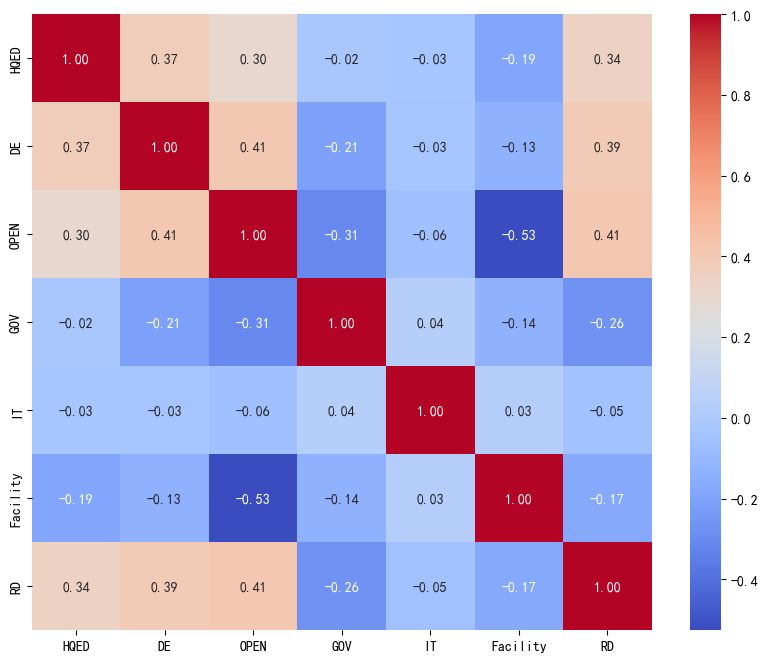

In [5]:
#df.corr() 用于 计算皮尔逊相关系数，结果同上
df_hotplot = df_1.drop(['province','year'],axis=1).corr()
#del df[['province','year']]

# 删除第1列和第3列
'''
df = df.drop(df.columns[[0, 2]], axis=1)
print(df)
'''

# 删除列并返回该列
'''
col = df.pop('col2')
print(df)
print(col)
'''

#更改字体，让图片显示中文
plt.rcParams['font.sans-serif'] = 'SimHei'  #这边设置的是黑体
#让图片中可以显负号
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10,8))
sns.heatmap(df_hotplot,annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [6]:
#做线性回归
X = df_1['DE']
X=sm.add_constant(X)
modle = sm.OLS(df_1['HQED'],X)  #线性回归
modle = modle.fit()   #拟合模型
modle.summary() #总结打印结果

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   HQED   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     84.83
Date:                Fri, 27 Jun 2025   Prob (F-statistic):           7.75e-19
Time:                        10:04:35   Log-Likelihood:                 240.84
No. Observations:                 527   AIC:                            -477.7
Df Residuals:                     525   BIC:                            -469.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4320      0.010     45.302      0.000       0.413       0.451
DE             0.5297      0.058      9.210      0.000       0.417       0.643
==============================================================================
Omnibus:                       18.070   Durbin-Watson:                   0.484
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.328
Skew:                          -0.398   Prob(JB):                     0.000173
Kurtosis:                       2.608   Cond. No.                         8.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
X = df_1[['DE','OPEN']]
y=df_1['HQED']

# 创建线性回归模型
linear_model = LinearRegression()
linear_model.fit(X,y)

# 创建决策树回归模型
'''
tree_model = DecisionTreeRegressor()
tree_model.fit(X,y)

# 创建随机森林回归模型
forest_model = RandomForestRegressor()
forest_model.fit(X,y)
'''

'\ntree_model = DecisionTreeRegressor()\ntree_model.fit(X,y)\n\n# 创建随机森林回归模型\nforest_model = RandomForestRegressor()\nforest_model.fit(X,y)\n'

In [9]:
df_dc = df_ori.describe().T
df_dc.to_csv('./实证分析描述性统计.csv',encoding='gbk')